1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1: African_elephant with probability 80.82%
2: tusker with probability 5.73%
3: Indian_elephant with probability 4.64%


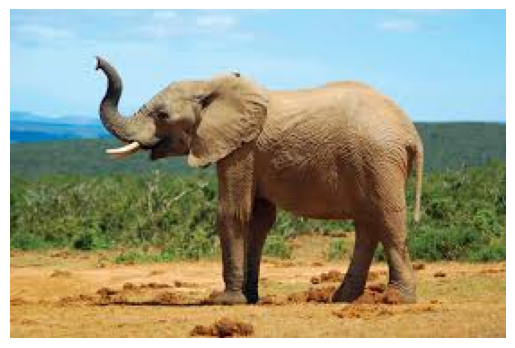

In [ ]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained MobileNetV2 model
model = MobileNetV2(weights='imagenet')

# Load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

# Predict the animal
def predict_animal(img_path):
    img_array = load_and_preprocess_image(img_path)

    # Make predictions
    preds = model.predict(img_array)

    # Decode and display predictions
    decoded_preds = decode_predictions(preds, top=3)[0]
    for i, pred in enumerate(decoded_preds):
        print(f"{i+1}: {pred[1]} with probability {pred[2]*100:.2f}%")

    # Display the image
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Test the model on an example image
image_path = '/content/elephant.jpg'  # Replace with your image path
predict_animal(image_path)


Saving tiger.jpg to tiger.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1: tiger with probability 91.17%
2: tiger_cat with probability 5.93%
3: jaguar with probability 0.30%


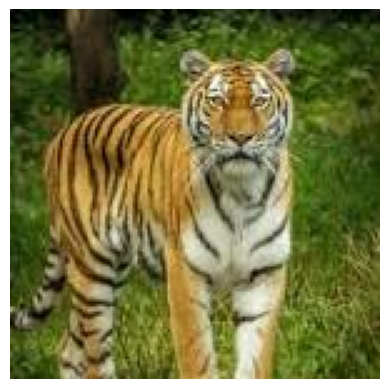

In [ ]:
# Install necessary libraries
!pip install tensorflow opencv-python matplotlib

# Import required libraries
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

# Load the pre-trained MobileNetV2 model
model = MobileNetV2(weights='imagenet')

# Function to load and preprocess the uploaded image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

# Function to predict the animal in the image
def predict_animal(img_path):
    img_array = load_and_preprocess_image(img_path)

    # Make predictions
    preds = model.predict(img_array)

    # Decode and display predictions
    decoded_preds = decode_predictions(preds, top=3)[0]
    for i, pred in enumerate(decoded_preds):
        print(f"{i+1}: {pred[1]} with probability {pred[2]*100:.2f}%")

    # Display the image
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Upload an image
uploaded = files.upload()

# Get the path to the uploaded image
img_path = list(uploaded.keys())[0]

# Predict the animal in the uploaded image
predict_animal(img_path)



<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1: tiger with probability 95.31%
2: tiger_cat with probability 2.72%
3: lynx with probability 0.08%


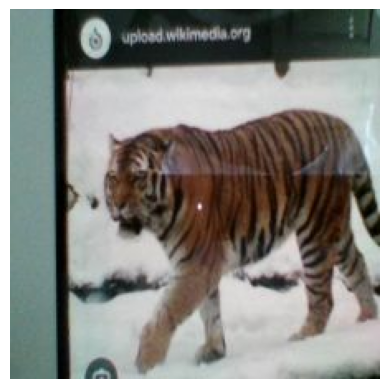

In [ ]:
# Install necessary libraries
!pip install tensorflow opencv-python

# Import required libraries
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
import cv2
from google.colab import files
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Load the pre-trained MobileNetV2 model
model = MobileNetV2(weights='imagenet')

# Function to capture image from webcam
def capture_image():
    display(Javascript('''
    async function takePhoto() {
      const div = document.createElement('div');
      const video = document.createElement('video');
      const button = document.createElement('button');
      button.textContent = 'Take photo';
      div.appendChild(video);
      div.appendChild(button);
      document.body.appendChild(div);

      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      video.srcObject = stream;
      await video.play();

      // Take a snapshot when the button is clicked
      const canvas = document.createElement('canvas');
      canvas.width = 224;
      canvas.height = 224;
      const ctx = canvas.getContext('2d');
      ctx.drawImage(video, 0, 0, canvas.width, canvas.height);

      stream.getTracks().forEach(track => track.stop());
      div.remove();
      return canvas.toDataURL('image/jpeg', 0.8);
    }
    '''))
    data_url = eval_js('takePhoto()')
    img_bytes = b64decode(data_url.split(',')[1])
    img = Image.open(io.BytesIO(img_bytes))
    return img

# Function to preprocess and predict animal in the image
def predict_animal(image):
    img = image.resize((224, 224))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make predictions
    preds = model.predict(img_array)

    # Decode and display predictions
    decoded_preds = decode_predictions(preds, top=3)[0]
    for i, pred in enumerate(decoded_preds):
        print(f"{i+1}: {pred[1]} with probability {pred[2]*100:.2f}%")

    # Display the image
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Capture image from webcam
img = capture_image()

# Predict the animal in the captured image
predict_animal(img)
